In [8]:
class Point():
    def __init__(self, x=0, y=0):
        self.x, self.y = x, y
    
    def __str__(self):
        return f'Point: ({str(self.x)}, {str(self.y)})'
    
    def __repr__(self):
        return self.__str__()

In [9]:
# p, q, r (q is the center point)
def counterClockwise(p, q, r):
    pq, qr = Point(q.x - p.x, q.y - p.y), Point(r.x - q.x, r.y - q.y)
    
    # cross product of vectors gives the direction of normal; normal is negative Z if counter-clockwise
    # normal = pq.y * qr.x - qr.y * pq.x < 0
    
    # slope of vector pq should be less than qr for p, q, r to be counter-clockwise
    # (q.y - p.y)*(r.x - q.x) - (r.y - q.y)*(q.x - p.x)<0
    
    return (pq.y * qr.x - qr.y * pq.x) < 0

In [87]:
p = Point(0, 1)
q = Point(0, 0)
r = Point(1, 0)
counterClockwise(p, r, q)

False

In [11]:
def getLeftPoint(points):
    left = 0
    for i, p in enumerate(points):
        if p.x < points[left].x:
            left = i
        elif p.x == points[left].x and p.y > points[left].y:
            left = i
    return left

In [12]:
def getConvexHull(points):
    n = len(points)
    if n<3:
        return
    
    hull = []    
    left = getLeftPoint(points)    
    p = left

    while True:
        hull.append(p)
        r = (p + 1) % n
        for q in range(n):
            if counterClockwise(points[p], points[q], points[r]):
                r = q
        p = r
        if p==left:
            break
    return list(points[x] for x in hull)

In [88]:
points = []
points.append(Point(0, 0))
points.append(Point(0, 1))
points.append(Point(1, 0))
points.append(Point(2, 2))
points.append(Point(1, 1))
points.append(Point(2, 1))
points.append(Point(3, 0))
points.append(Point(0, 3))
points.append(Point(3, 3))

hull = getConvexHull(points)
hull += [hull[0]]
hull

[Point: (0, 3),
 Point: (0, 0),
 Point: (1, 0),
 Point: (3, 0),
 Point: (3, 3),
 Point: (0, 3)]

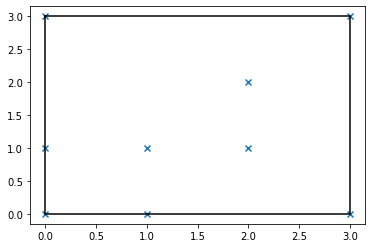

In [23]:
import matplotlib.pyplot as plt
plt.scatter([p.x for p in points], [p.y for p in points], marker='x')
plt.plot([p.x for p in hull], [p.y for p in hull], c='k')

In [85]:
from scipy.spatial import ConvexHull
import numpy as np
points = np.random.rand(30, 2)
hull = ConvexHull(points)
hull_vertices = points[hull.vertices]
hull_vertices = np.r_[hull_vertices, [hull_vertices[0]]]

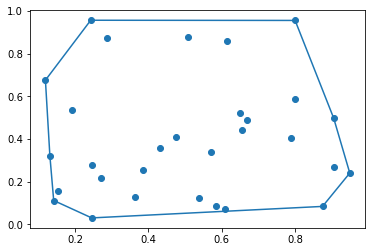

In [86]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

plt.scatter(points[:, 0], points[:, 1], marker='o')
plt.plot(hull_vertices[:, 0], hull_vertices[:, 1])